In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import datetime
import pickle
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
slv = pd.read_csv('data/SLV.csv')

fmt = '%Y-%m-%d' 
slv['Date']=pd.to_datetime(slv['Date'],format=fmt)
slv.set_index(pd.DatetimeIndex(slv['Date']),inplace=True)

slv.drop(['Adj Close'],axis=1,inplace=True)

slv['pct_change'] = 100*slv['Close'].pct_change()

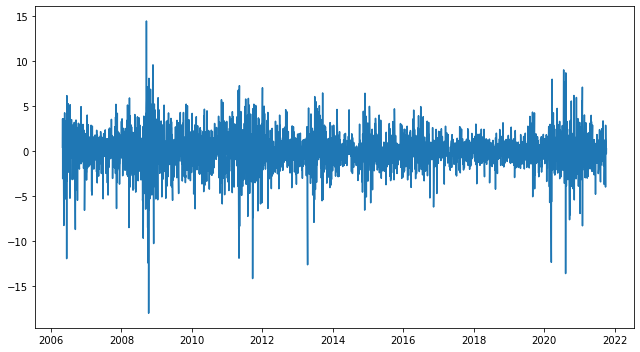

In [4]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
ax.plot(slv.index,slv['pct_change'])
fig.tight_layout()

In [5]:
slv_pc = slv['pct_change'][1:]

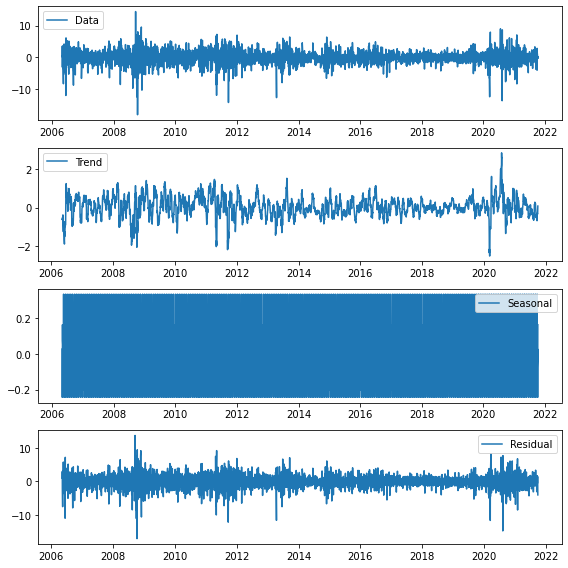

In [6]:
deco = sm.tsa.seasonal_decompose(slv_pc,model='additive',period=15)
observed = deco.observed
trend = deco.trend
seasonal = deco.seasonal
residual = deco.resid

fig = plt.figure(figsize=(8,8))
plt.subplot(411)
plt.plot(observed,label = 'Data')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')
fig.tight_layout()



In [7]:
from statsmodels.tsa.stattools import adfuller,kpss

In [8]:
adf_result = adfuller(slv_pc)
print(f'Augmented Dickey-Fuller test statistic: {adf_result[0]}')
print(f'Augmented Dickey-Fuller test p-value: {adf_result[1]}')

Augmented Dickey-Fuller test statistic: -61.99157669250005
Augmented Dickey-Fuller test p-value: 0.0


In [9]:
kpss_result = kpss(slv_pc,nlags='auto')
print(f'Kwiatkowski-Phillips-Schmidt-Shin test results: {kpss_result[0],kpss_result[1]}')

Kwiatkowski-Phillips-Schmidt-Shin test results: (0.08843482474041313, 0.1)


/Users/ewilson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


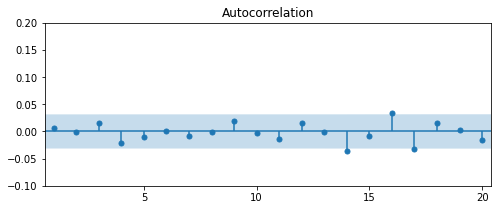

In [10]:
fig, ax = plt.subplots(1,1,figsize=(8,3))
plot_acf(slv_pc,alpha=0.05,lags=20,ax=ax)
ax.set_ylim(-0.1,0.2)
ax.set_xlim(0.6,20.4)
ax.set_xticks([5,10,15,20])
plt.show()

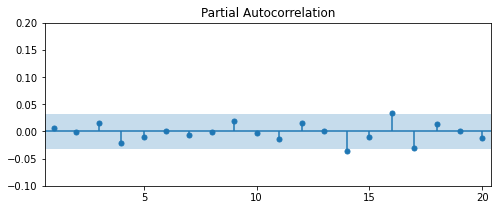

In [11]:
fig, ax = plt.subplots(1,1,figsize=(8,3))
plot_pacf(slv_pc,alpha=0.05,lags=20,ax=ax)
ax.set_ylim(-0.1,0.2)
ax.set_xlim(0.6,20.4)
ax.set_xticks([5,10,15,20])
plt.show()

In [12]:
wk_slvpc=slv_pc.resample('W').last()

Augmented Dickey-Fuller test results: (-9.431585608567215, 5.172724150349748e-16)


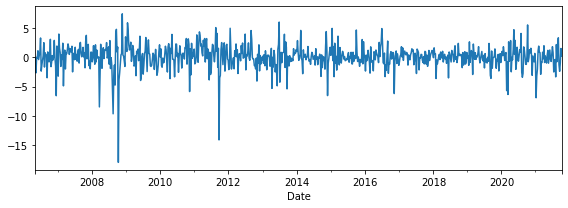

In [13]:
fig = plt.figure(figsize=(8,3))
adf_result = adfuller(wk_slvpc)
print(f'Augmented Dickey-Fuller test results: {adf_result[0],adf_result[1]}')
wk_slvpc.plot()
fig.tight_layout()

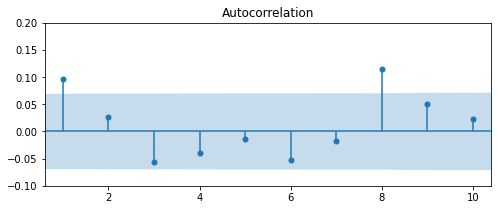

In [53]:
lags = 10
fig, ax = plt.subplots(1,1,figsize=(8,3))
plot_acf(wk_slvpc,alpha=0.05,lags=lags,ax=ax)
ax.set_ylim(-0.1,0.2)
ax.set_xlim(0.6,lags+0.4)
plt.show()

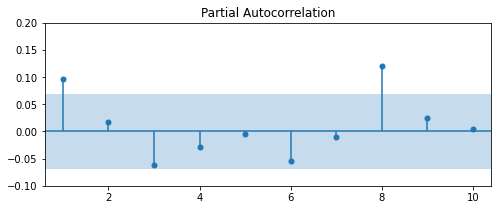

In [52]:
lags = 10
fig, ax = plt.subplots(1,1,figsize=(8,3))
plot_pacf(wk_slvpc,alpha=0.05,lags=lags,ax=ax)
ax.set_ylim(-0.1,0.2)
ax.set_xlim(0.6,lags+0.4)
plt.show()

In [19]:
data = wk_slvpc
train_ratio = 0.8
split = round(train_ratio * len(data))
train, test = data[0:split], data[split:]

In [21]:
from statsmodels.tsa.arima.model import ARIMA
metrics = []
for d in range(2):
    for p in range(9):
        for q in range(9):
            try:
                model = ARIMA(train,order=(p,d,q),trend='n')
                result = model.fit()
                metrics.append((p,d,q,result.aic,result.bic))
            except:
                pass
metr_resid = pd.DataFrame(metrics,columns=['p','d','q','AIC','BIC'])
metr_resid.sort_values('AIC').head()

/Users/ewilson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ewilson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ewilson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ewilson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ewilson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum 

/Users/ewilson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ewilson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ewilson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ewilson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ewilson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum 

,p,d,q,AIC,BIC
72,8,0,0,2771.303212,2811.526465
73,8,0,1,2772.572570,2817.265073
40,4,0,4,2773.647166,2813.870419
74,8,0,2,2773.687055,2822.848808
17,1,0,8,2773.693435,2818.385938


In [22]:
metr_resid.sort_values('BIC').head()

,p,d,q,AIC,BIC
9,1,0,0,2776.517799,2785.456299
1,0,0,1,2776.995715,2785.934215
0,0,0,0,2782.458932,2786.928182
2,0,0,2,2777.786021,2791.193772
18,2,0,0,2778.230377,2791.638128


In [23]:
arma800 = ARIMA(train,order=(8,0,0),trend='n')
res800 = arma800.fit()
print(res800.summary())

                               SARIMAX Results                                
Dep. Variable:             pct_change   No. Observations:                  645
Model:                 ARIMA(8, 0, 0)   Log Likelihood               -1376.652
Date:                Thu, 02 Dec 2021   AIC                           2771.303
Time:                        20:33:43   BIC                           2811.526
Sample:                    05-07-2006   HQIC                          2786.910
                         - 09-09-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1072      0.038      2.850      0.004       0.033       0.181
ar.L2          0.0354      0.042      0.835      0.404      -0.048       0.119
ar.L3         -0.0516      0.040     -1.291      0.1

In [24]:
arma800s = ARIMA(train,order=([1,6,8],0,0),trend='n')
res800s = arma800s.fit()
print(res800s.summary())

                                 SARIMAX Results                                  
Dep. Variable:                 pct_change   No. Observations:                  645
Model:             ARIMA([1, 6, 8], 0, 0)   Log Likelihood               -1377.978
Date:                    Thu, 02 Dec 2021   AIC                           2763.957
Time:                            20:53:09   BIC                           2781.834
Sample:                        05-07-2006   HQIC                          2770.893
                             - 09-09-2018                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1109      0.036      3.083      0.002       0.040       0.181
ar.L6         -0.0747      0.031     -2.408      0.016      -0.135      -0.014
ar.L8          0.141

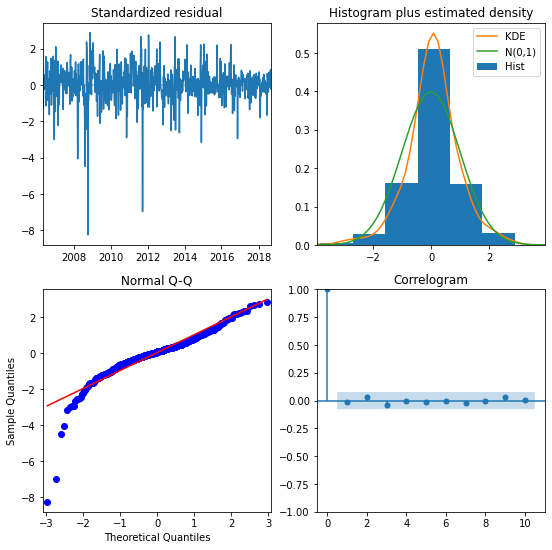

In [25]:
res800s.plot_diagnostics(figsize=(9,9))
plt.show()

In [81]:
pred800s_ci = pred800s.conf_int()

In [76]:
pred800s = res800s.get_prediction(start=-52,dynamic=False)
pred800s_mean = pred800s.predicted_mean
pred800s_ci = pred800s.conf_int()
pred800s_ll = pred800s_ci.loc[:,'lower pct_change']
pred800s_ul = pred800s_ci.loc[:,'upper pct_change']

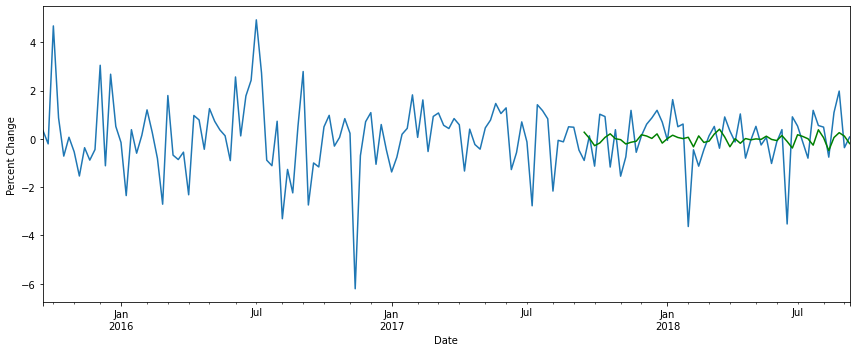

In [80]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
train[-3*52:].plot()
#ax.fill_between(pred800s_ll.index, pred800s_ll, pred800s_ul, color='red',alpha=0.2)
pred800s_mean.plot(color='green')
ax.set_ylabel('Percent Change')
fig.tight_layout()

In [93]:
pred800s_mean

Date
2017-09-17    0.274760
2017-09-24    0.022752
2017-10-01   -0.282930
2017-10-08   -0.171361
2017-10-15    0.059638
2017-10-22    0.207820
2017-10-29    0.005281
2017-11-05   -0.033537
2017-11-12   -0.213567
2017-11-19   -0.141270
2017-11-26   -0.098167
2017-12-03    0.169757
2017-12-10    0.116564
2017-12-17    0.017293
2017-12-24    0.205270
2017-12-31   -0.175623
2018-01-07    0.012696
2018-01-14    0.150310
2018-01-21    0.056120
2018-01-28    0.009171
2018-02-04    0.065326
2018-02-11   -0.331804
2018-02-18    0.121735
2018-02-25   -0.148664
2018-03-04   -0.095675
2018-03-11    0.198277
2018-03-18    0.398970
2018-03-25    0.077497
2018-04-01   -0.328730
2018-04-08    0.005397
2018-04-15   -0.184039
2018-04-22    0.012648
2018-04-29   -0.041443
2018-05-06   -0.002015
2018-05-13   -0.021877
2018-05-20    0.109783
2018-05-27   -0.023737
2018-06-03   -0.071693
2018-06-10    0.136316
2018-06-17   -0.109437
2018-06-24   -0.380942
2018-07-01    0.169447
2018-07-08    0.099029
2018-0

In [98]:
test = g_res800s.forecast(horizon=1)

In [101]:
test.variance

,h.1
Date,
2006-05-07,NaN
2006-05-14,NaN
2006-05-21,NaN
2006-05-28,NaN
2006-06-04,NaN
...,...
2018-08-12,NaN
2018-08-19,NaN
2018-08-26,NaN


<AxesSubplot:xlabel='Date'>

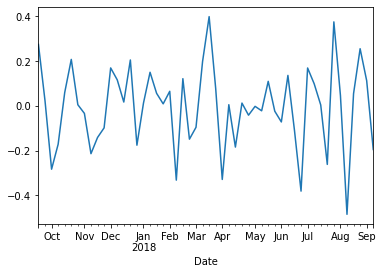

In [68]:
fig, ax = plt.subplots(1,1,figsize=(9,5))

pred800s.predicted_mean.plot()


# Get confidence intervals of forecast
confidence_intervals = pred_365_traindata.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Open']
upper_limits = confidence_intervals.loc[:,'upper Open']

In [40]:
from arch import arch_model

In [41]:
arima_residual=res800s.resid
metrics = []
for p in range(7):
    for q in range(7):
        try:
            gmodel = arch_model(arima_residual,p=p,q=q,mean='zero',vol='GARCH',dist='skewt')
            gresult = gmodel.fit(disp='off')
            metrics.append((p,q,gresult.aic,gresult.bic))
        except:
            pass
metr_garch = pd.DataFrame(metrics,columns=['p','q','AIC','BIC'])
metr_garch.sort_values('AIC').head()

,p,q,AIC,BIC
1,1,1,2573.447979,2595.794230
2,1,2,2575.310990,2602.126492
8,2,1,2575.447978,2602.263480
9,2,2,2576.280617,2607.565369
3,1,3,2576.310346,2607.595098


In [43]:
g_arma800s = arch_model(res800s.resid,p=1,q=1,mean='zero',vol='GARCH',dist='skewt')
g_res800s = g_arma800s.fit(disp='off')
print(g_res800s.summary())

                             Zero Mean - GARCH Model Results                             
Dep. Variable:                              None   R-squared:                       0.000
Mean Model:                            Zero Mean   Adj. R-squared:                  0.002
Vol Model:                                 GARCH   Log-Likelihood:               -1281.72
Distribution:      Standardized Skew Student's t   AIC:                           2573.45
Method:                       Maximum Likelihood   BIC:                           2595.79
                                                   No. Observations:                  645
Date:                           Thu, Dec 02 2021   Df Residuals:                      645
Time:                                   22:23:13   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
--------------------------------------

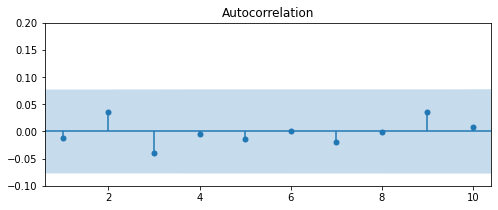

In [51]:
lags=10
fig, ax = plt.subplots(1,1,figsize=(8,3))
plot_acf(g_res800s.resid,alpha=0.05,lags=lags,ax=ax)
ax.set_ylim(-0.1,0.2)
ax.set_xlim(0.6,lags+0.4)
plt.show()

In [46]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lj_gres800s = acorr_ljungbox(g_res800s.resid, lags=10)

print(f'P-values are: {lj_gres800s[-1]}')

P-values are: [0.76599388 0.64397    0.58315424 0.74338382 0.83884201 0.91274962
 0.94009325 0.96956435 0.95688913 0.97556184]


In [55]:
g_res800s

                           Constant Mean - GARCH Model Results                           
Dep. Variable:                              None   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -1281.20
Distribution:      Standardized Skew Student's t   AIC:                           2574.41
Method:                       Maximum Likelihood   BIC:                           2601.22
                                                   No. Observations:                  645
Date:                           Thu, Dec 02 2021   Df Residuals:                      644
Time:                                   22:24:42   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
--------------------------------------

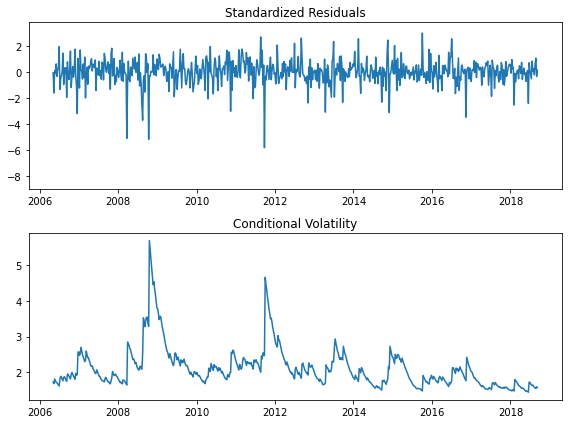

In [61]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6))
ax1.plot(g_res800s.std_resid)
ax1.set_ylim(-9,3.8)
ax1.set_title('Standardized Residuals')
ax2.plot(g_res800s.conditional_volatility)
ax2.set_title('Conditional Volatility')
fig.tight_layout()

In [26]:
arma100=ARIMA(train,order=(1,0,0),trend='n')
res100 = arma100.fit()
print(res100.summary())

                               SARIMAX Results                                
Dep. Variable:             pct_change   No. Observations:                  645
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1386.259
Date:                Thu, 02 Dec 2021   AIC                           2776.518
Time:                        20:59:34   BIC                           2785.456
Sample:                    05-07-2006   HQIC                          2779.986
                         - 09-09-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1107      0.036      3.082      0.002       0.040       0.181
sigma2         4.3082      0.089     48.485      0.000       4.134       4.482
Ljung-Box (Q):                       41.29   Jarque-

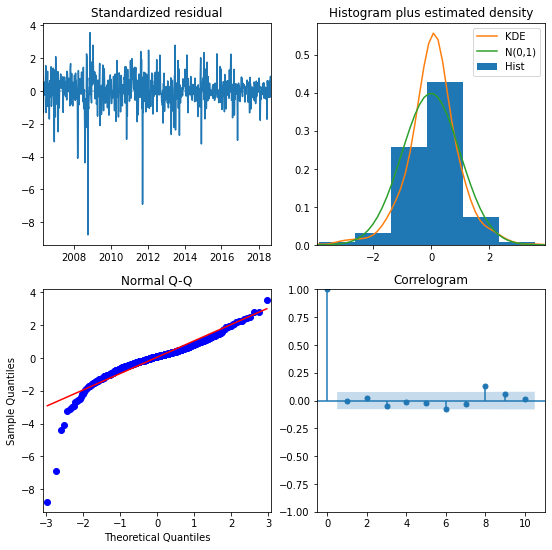

In [27]:
res100.plot_diagnostics(figsize=(9,9))
plt.show()

In [34]:
seas=[]
D = 0
#s = 7
for s in range(8):
    for P in range(3):
        for Q in range(3):
            try:
                model = ARIMA(train,order=(1,0,0),seasonal_order=(P,D,Q,s),trend='n')
                result = model.fit()
                seas.append((P,D,Q,s,result.aic,result.bic))
            except:
                pass
seas_resid = pd.DataFrame(seas,columns=['P','D','Q','s','AIC','BIC'])
seas_resid.sort_values('AIC').head()

/Users/ewilson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,P,D,Q,s,AIC,BIC
21,0,0,2,4,2768.305207,2786.182209
25,2,0,0,4,2768.661823,2786.538824
24,1,0,2,4,2770.226496,2792.572747
26,2,0,1,4,2770.592861,2792.939112
27,2,0,2,4,2772.226515,2799.042016


In [37]:
arma100sea=ARIMA(train,order=(1,0,0),seasonal_order=(0,0,(0,1),4),trend='n')
res100sea = arma100sea.fit()
print(res100sea.summary())

                                     SARIMAX Results                                     
Dep. Variable:                        pct_change   No. Observations:                  645
Model:             ARIMA(1, 0, 0)x(0, 0, [2], 4)   Log Likelihood               -1380.162
Date:                           Thu, 02 Dec 2021   AIC                           2766.324
Time:                                   22:13:04   BIC                           2779.732
Sample:                               05-07-2006   HQIC                          2771.526
                                    - 09-09-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1069      0.036      2.979      0.003       0.037       0.177
ma.S.L8        0.1377      0.027      5.071

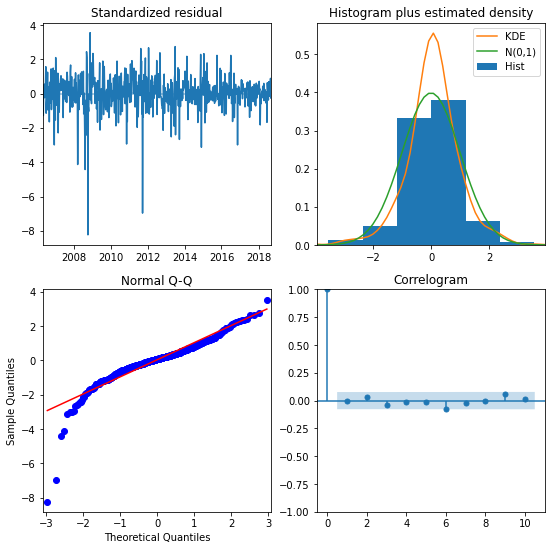

In [38]:
res100sea.plot_diagnostics(figsize=(9,9))
plt.show()